# SPensiones - v2

In [43]:
import requests
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Para actualizar data SPensiones

In [2]:
inityear = {'A': 2002, 'B': 2002, 'C': 1981, 'D': 2002, 'E': 2000}

today = datetime.now()
fin = today.year
conf = today.strftime("%Y%m%d")

for tf, ini in inityear.items():
    source = f'https://www.spensiones.cl/apps/valoresCuotaFondo/vcfAFPxls.php?aaaaini={ini}&aaaafin={fin}&tf={tf}&fecconf={conf}'
    r = requests.get(source)
    path = f'vcf{tf}{ini}-{fin}.csv'

    with open(path, 'wb') as out_file:
        out_file.write(r.content)

# Para leer data

In [3]:
dfA = pd.read_csv('vcfA2002-2022.csv', sep = ';', skiprows = 6384, index_col = False, decimal = ',', thousands = ".")
dfB = pd.read_csv('vcfB2002-2022.csv', sep = ';', skiprows = 6384, index_col = False, decimal = ',', thousands = ".")
dfC = pd.read_csv('vcfC1981-2022.csv', sep = ';', skiprows = 14345, index_col = False, decimal = ',', thousands = ".")
dfD = pd.read_csv('vcfD2002-2022.csv', sep = ';', skiprows = 6384, index_col = False, decimal = ',', thousands = ".")
dfE = pd.read_csv('vcfE2000-2022.csv', sep = ';', skiprows = 7282, index_col = False, decimal = ',', thousands = ".")

cols = pd.MultiIndex.from_tuples([("Fecha",""), ("CAPITAL","Valor Cuota"), ("CAPITAL","Valor Patrimonio"),
                                  ("CUPRUM","Valor Cuota"), ("CUPRUM","Valor Patrimonio"),
                                  ("HABITAT","Valor Cuota"), ("HABITAT","Valor Patrimonio"),
                                 ("MODELO","Valor Cuota"), ("MODELO","Valor Patrimonio"),
                                 ("PLANVITAL","Valor Cuota"), ("PLANVITAL","Valor Patrimonio"),
                                 ("PROVIDA","Valor Cuota"), ("PROVIDA","Valor Patrimonio"),
                                 ("UNO","Valor Cuota"), ("UNO","Valor Patrimonio")])
# set cols to df.columns
dfA.columns = cols
dfB.columns = cols
dfC.columns = cols
dfD.columns = cols
dfE.columns = cols

dfA['Fondo'] = 'Fondo A'
dfB['Fondo'] = 'Fondo B'
dfC['Fondo'] = 'Fondo C'
dfD['Fondo'] = 'Fondo D'
dfE['Fondo'] = 'Fondo E'
df = pd.concat([dfA, dfB, dfC, dfD, dfE])
df =df.dropna().drop_duplicates()
df["Fecha"] = pd.to_datetime(df["Fecha"])
df = df.set_index('Fecha')
df = df.melt(id_vars = 'Fondo', var_name = ['AFP', 'Tipo Valor'] ,ignore_index = False)
df = df[df['AFP'].isin(['CUPRUM', 'PLANVITAL']) & df['Tipo Valor'].isin(['Valor Cuota'])]
df = df.reset_index().drop('Tipo Valor', axis = 1).pivot(index = 'Fecha', columns = ['AFP', 'Fondo'])['value']
df = df.replace('\.', '', regex=True).replace('\,', '.', regex=True).apply(pd.to_numeric, axis=1)

In [4]:
df.head()

AFP           CUPRUM                                         PLANVITAL  \
Fondo        Fondo A   Fondo B   Fondo C   Fondo D   Fondo E   Fondo A   
Fecha                                                                    
2019-10-01  48258.46  43055.49  50888.69  39658.88  48160.79  44699.55   
2019-10-02  48116.34  42939.34  50814.73  39604.29  48102.45  44567.67   
2019-10-03  47673.16  42662.33  50652.28  39575.13  48146.72  44167.37   
2019-10-04  47371.29  42509.66  50624.14  39688.18  48356.95  43896.88   
2019-10-05  47371.29  42509.66  50624.14  39688.18  48356.95  43896.88   

AFP                                                 
Fondo        Fondo B   Fondo C   Fondo D   Fondo E  
Fecha                                               
2019-10-01  41159.20  88555.28  36758.48  75497.97  
2019-10-02  41035.23  88415.26  36704.83  75386.72  
2019-10-03  40773.90  88142.38  36685.16  75451.24  
2019-10-04  40642.70  88131.28  36802.14  75778.18  
2019-10-05  40642.70  88131.28  36802.14  75778.18

# Calculos de Rentabilidades

## Mensual

In [5]:
#rent a fin de mes 
rent_mensual_fin = df.asfreq('M').pct_change().melt(ignore_index = False)

In [13]:
rent_mensual_fin.tail()

,AFP,Fondo,value
Fecha,,,
2022-02-28,PLANVITAL,Fondo E,0.036537
2022-03-31,PLANVITAL,Fondo E,0.013142
2022-04-30,PLANVITAL,Fondo E,0.025381
2022-05-31,PLANVITAL,Fondo E,0.022535
2022-06-30,PLANVITAL,Fondo E,0.016281


In [7]:
rent_mensual_fin.loc[rent_mensual_fin['AFP'] == 'PLANVITAL']['2021-06-01':]

C:\Users\CSUB6487\AppData\Local\Temp/ipykernel_10968/126271140.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rent_mensual_fin.loc[rent_mensual_fin['AFP'] == 'PLANVITAL']['2021-06-01':]


,AFP,Fondo,value
Fecha,,,
2021-06-30,PLANVITAL,Fondo A,0.017105
2021-07-31,PLANVITAL,Fondo A,0.006343
2021-08-31,PLANVITAL,Fondo A,0.033516
2021-09-30,PLANVITAL,Fondo A,-0.004049
2021-10-31,PLANVITAL,Fondo A,0.015194
...,...,...,...
2022-02-28,PLANVITAL,Fondo E,0.036537
2022-03-31,PLANVITAL,Fondo E,0.013142
2022-04-30,PLANVITAL,Fondo E,0.025381


C:\Users\CSUB6487\AppData\Local\Temp/ipykernel_10968/129513247.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rent_mensual_fin.loc[rent_mensual_fin['AFP'] == 'PLANVITAL']['2021-05-01':].pivot(columns = 'Fondo', values = 'value').plot(figsize = (15,10), grid = True, style = 'o-')


<AxesSubplot:xlabel='Fecha'>

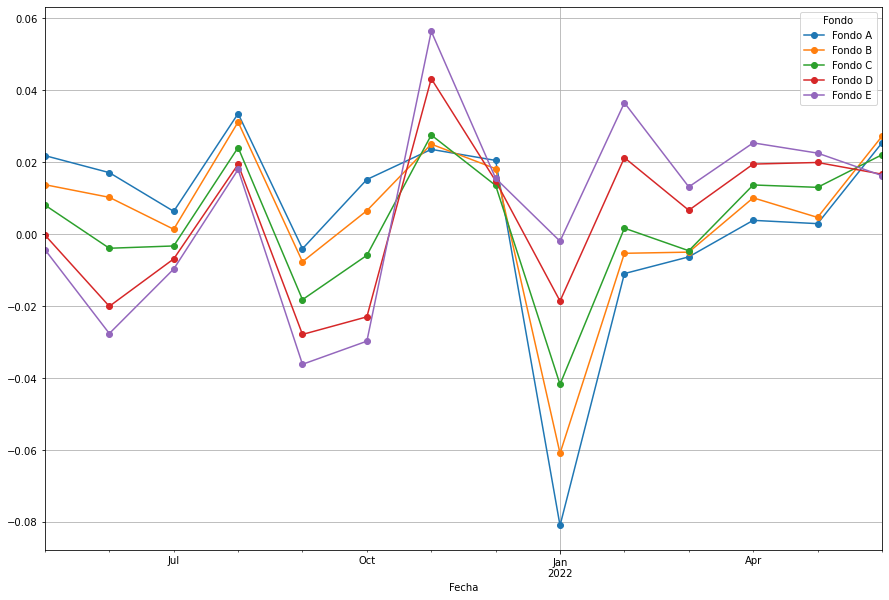

In [25]:
rent_mensual_fin.loc[rent_mensual_fin['AFP'] == 'PLANVITAL']['2021-05-01':].pivot(columns = 'Fondo', values = 'value').plot(figsize = (15,10), grid = True, style = 'o-')

In [49]:
rent_mensual_fin.sort_values(by = ['Fecha', 'Fondo']).tail(10)

,AFP,Fondo,value
Fecha,,,
2022-06-30,CUPRUM,Fondo A,0.026333
2022-06-30,PLANVITAL,Fondo A,0.025371
2022-06-30,CUPRUM,Fondo B,0.027980
2022-06-30,PLANVITAL,Fondo B,0.027206
2022-06-30,CUPRUM,Fondo C,0.022655
2022-06-30,PLANVITAL,Fondo C,0.022075
2022-06-30,CUPRUM,Fondo D,0.016613
2022-06-30,PLANVITAL,Fondo D,0.016675
2022-06-30,CUPRUM,Fondo E,0.017623


## Fondo ganador por mes

In [50]:
x = rent_mensual_fin.reset_index().groupby(['Fecha', 'AFP'])['value'].idxmax().values
x = x[~np.isnan(x)]
win_mes = rent_mensual_fin.iloc[x]

## Semanal

In [55]:
rent_semanal_fin = df.asfreq('W-Wed').pct_change().melt(ignore_index = False)
rent_semanal_fin.tail()

,AFP,Fondo,value
Fecha,,,
2022-06-08,PLANVITAL,Fondo E,0.001309
2022-06-15,PLANVITAL,Fondo E,-0.012369
2022-06-22,PLANVITAL,Fondo E,0.018763
2022-06-29,PLANVITAL,Fondo E,0.007567
2022-07-06,PLANVITAL,Fondo E,0.015043


C:\Users\CSUB6487\AppData\Local\Temp/ipykernel_10968/3347410303.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rent_semanal_fin.loc[rent_semanal_fin['AFP'] == 'PLANVITAL']['2022-06'].pivot(columns = 'Fondo', values = 'value').plot(figsize = (15,10), grid = True, style = 'o-')


<AxesSubplot:xlabel='Fecha'>

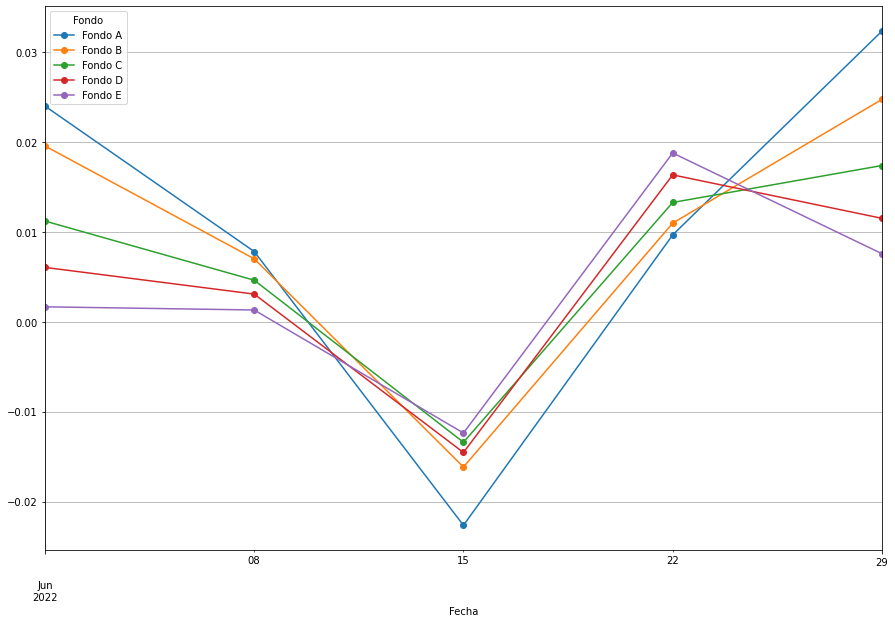

In [199]:
rent_semanal_fin.loc[rent_semanal_fin['AFP'] == 'PLANVITAL']['2022-06'].pivot(columns = 'Fondo', values = 'value').plot(figsize = (15,10), grid = True, style = 'o-')

## Semanal - intento 2 - la rent deberia ser calculada MTD

In [109]:
monthly_df = df.asfreq('MS').melt(ignore_index = False)
monthly_df['periodo'] = monthly_df.index.strftime('%B-%Y')
weekly_df = df.asfreq('W').melt(ignore_index = False)
weekly_df['periodo'] = weekly_df.index.strftime('%B-%Y')
weekly_df = pd.concat([monthly_df, weekly_df], axis = 0).sort_values(by = 'Fecha')


In [115]:
weekly_df[(weekly_df['AFP'] == 'PLANVITAL') & (weekly_df['Fondo'] == 'Fondo A')].head(6)

,AFP,Fondo,value,periodo
Fecha,,,,
2019-10-01,PLANVITAL,Fondo A,44699.55,October-2019
2019-10-06,PLANVITAL,Fondo A,43896.88,October-2019
2019-10-13,PLANVITAL,Fondo A,44196.53,October-2019
2019-10-20,PLANVITAL,Fondo A,44861.73,October-2019
2019-10-27,PLANVITAL,Fondo A,45070.84,October-2019
2019-11-01,PLANVITAL,Fondo A,45347.41,November-2019


In [186]:
def weekly_returns(x):
    out = (x -x[0])/x[0]
    return(out)
weekly_df['retorno_semanal'] = weekly_df.groupby(['AFP', 'Fondo', 'periodo'])['value'].transform(weekly_returns)

In [187]:
weekly_df[(weekly_df['AFP'] == 'PLANVITAL') & (weekly_df['Fondo'] == 'Fondo A')].tail(9)

,AFP,Fondo,value,periodo,retorno_semanal
Fecha,,,,,
2022-05-29,PLANVITAL,Fondo A,53308.81,May-2022,-0.017873
2022-06-01,PLANVITAL,Fondo A,54125.84,June-2022,0.000000
2022-06-05,PLANVITAL,Fondo A,53728.15,June-2022,-0.007348
2022-06-12,PLANVITAL,Fondo A,53622.97,June-2022,-0.009291
2022-06-19,PLANVITAL,Fondo A,52992.17,June-2022,-0.020945
2022-06-26,PLANVITAL,Fondo A,54492.79,June-2022,0.006780
2022-07-01,PLANVITAL,Fondo A,55953.31,July-2022,0.000000
2022-07-03,PLANVITAL,Fondo A,55953.31,July-2022,0.000000
2022-07-10,PLANVITAL,Fondo A,57556.77,July-2022,0.028657


<AxesSubplot:xlabel='Fecha'>

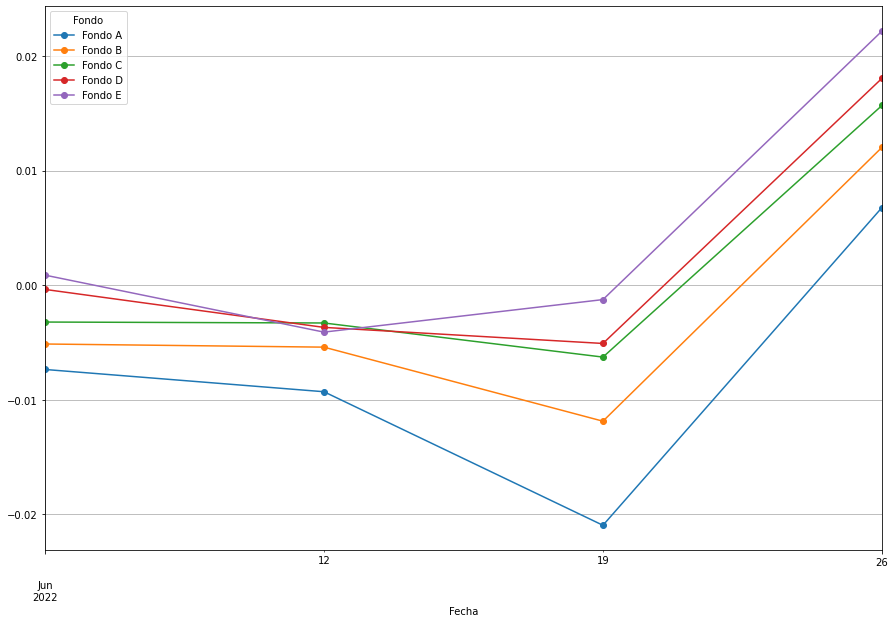

In [190]:
weekly_df.loc[weekly_df['AFP'] == 'PLANVITAL'].drop(weekly_df[weekly_df['retorno_semanal']==0].index).loc['2022-06', ['AFP', 'Fondo','retorno_semanal']].pivot(columns = 'Fondo', values = 'retorno_semanal').plot(figsize = (15,10), grid = True, style = 'o-')

<AxesSubplot:xlabel='Fecha'>

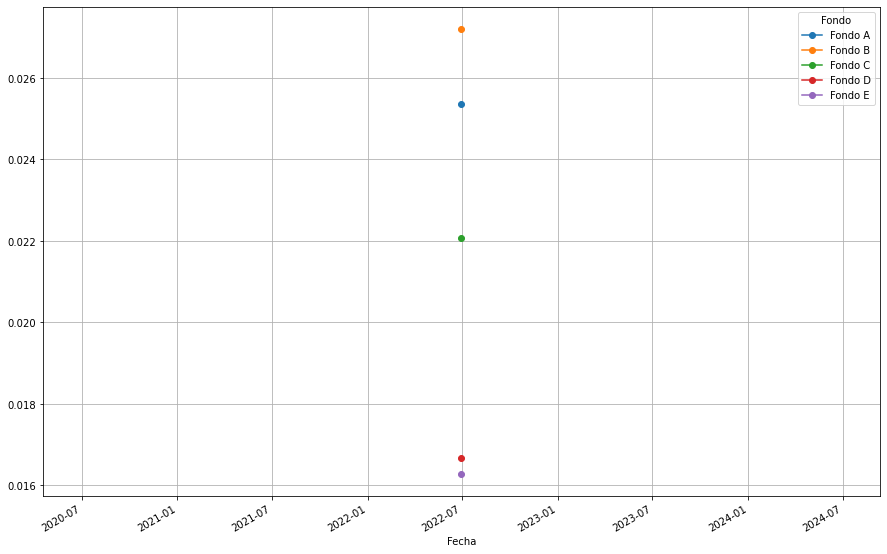

In [191]:
rent_mensual_fin.loc[rent_mensual_fin['AFP'] == 'PLANVITAL'].loc['2022-06'].pivot(columns = 'Fondo', values = 'value').plot(figsize = (15,10), grid = True, style = 'o-')

In [192]:
weekly_df.loc[weekly_df['AFP'] == 'PLANVITAL'].drop(weekly_df[weekly_df['retorno_semanal']==0].index).loc['2022-06', ['AFP', 'Fondo','retorno_semanal']].pivot(columns = 'Fondo', values = 'retorno_semanal')

Fondo,Fondo A,Fondo B,Fondo C,Fondo D,Fondo E
Fecha,,,,,
2022-06-05,-0.007348,-0.005126,-0.003210,-0.000364,0.000884
2022-06-12,-0.009291,-0.005400,-0.003292,-0.003676,-0.004089
2022-06-19,-0.020945,-0.011861,-0.006268,-0.005079,-0.001251
2022-06-26,0.006780,0.012032,0.015687,0.018056,0.022177


In [193]:
rent_mensual_fin.loc[rent_mensual_fin['AFP'] == 'PLANVITAL'].loc['2022-06'].pivot(columns = 'Fondo', values = 'value')

Fondo,Fondo A,Fondo B,Fondo C,Fondo D,Fondo E
Fecha,,,,,
2022-06-30,0.025371,0.027206,0.022075,0.016675,0.016281


<AxesSubplot:xlabel='Fecha'>

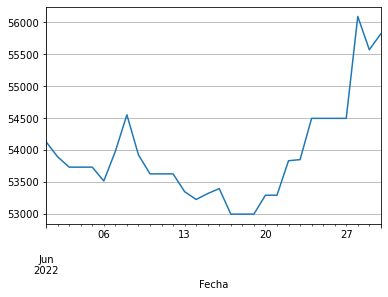

In [211]:
df[('PLANVITAL', 'Fondo A')].loc['2022-06'].plot(grid = True)

<AxesSubplot:xlabel='Fecha'>

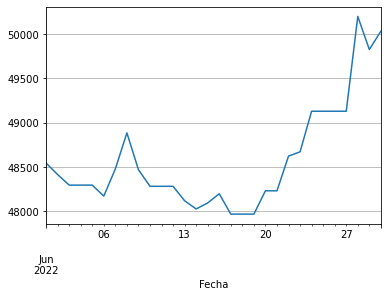

In [212]:
df[('PLANVITAL', 'Fondo B')].loc['2022-06'].plot(grid = True)

<AxesSubplot:xlabel='Fecha'>

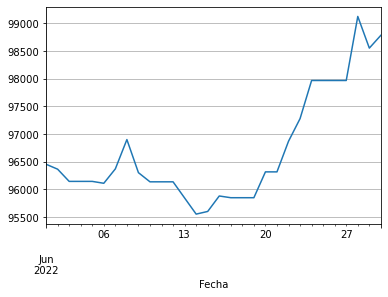

In [213]:
df[('PLANVITAL', 'Fondo C')].loc['2022-06'].plot(grid = True)

<AxesSubplot:xlabel='Fecha'>

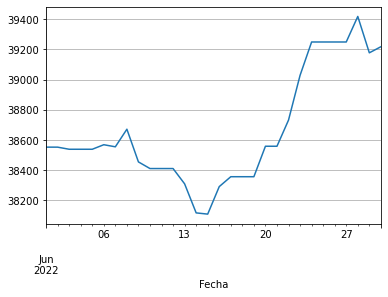

In [214]:
df[('PLANVITAL', 'Fondo D')].loc['2022-06'].plot(grid = True)

<AxesSubplot:xlabel='Fecha'>

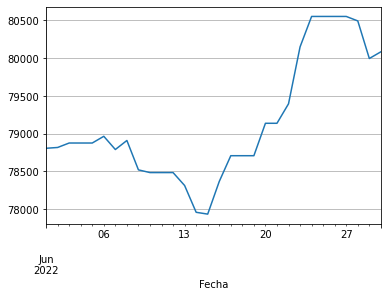

In [215]:
df[('PLANVITAL', 'Fondo E')].loc['2022-06'].plot(grid = True)

In [198]:
x = df[('PLANVITAL', 'Fondo E')].loc['2022-06']
print((x['2022-06-05'] - x['2022-06-01'])/x['2022-06-01'])
print((x['2022-06-12'] - x['2022-06-01'])/x['2022-06-01'])
print((x['2022-06-19'] - x['2022-06-01'])/x['2022-06-01'])
print((x['2022-06-26'] - x['2022-06-01'])/x['2022-06-01'])

0.0008844500858626819
-0.004088646516008887
-0.0012506657168239242
0.022176856263410278
